In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib import rc
import scipy.io as sio
import os 
import itertools
import re
from matplotlib.patches import Polygon

font = {'family' : 'sans-serif',
        'style' : 'normal',
        'weight' : 'light',
        'size'   : 20}

rc('font', **font)

In [27]:
DEBUG = False

In [28]:
def load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id):
    mat = sio.loadmat(file_path)
    mat_data = mat[file_name]['daq'][0, 0]
    t = pd.DataFrame(mat_data['t'][0,0], columns = ["timeStamp"])
    data = pd.DataFrame(mat_data['DAQ_DATA'][0, 0], columns = [
        'channel_1',
        'channel_2',
        'channel_3',
        'channel_4',
        'channel_5',
        'channel_6',
        'channel_7',
        'channel_8'
      ])
    #res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False).set_index('TimeStamp')
    res = pd.concat([t, data], axis = 1, ignore_index = False, sort = False)
    res['userID'] = user_id
    res['gamePhase'] = g_phase_id
    res['testPhase'] = phase_id
    res['movementID'] = movement_id
    return res

In [29]:
def generate_df():
    df = pd.DataFrame() # Main DataFrame
    rootdir = os.path.join(os.getcwd() + "/Data_Sets/")
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            if file.endswith(".mat"):
                file_path = os.path.join(subdir, file)
                file_name = file.replace(".mat", "")
                try: 
                    list_subdir = subdir.replace(rootdir,"").split("/")
                    user_id = [s for s in list_subdir if "user" in s][0].replace("user_","")
                    g_phase_id = [s for s in list_subdir if "game" in s][0] # Trainig Phase ID
                    list_fileName = ["".join(x) for _, x in itertools.groupby(file.split("_")[1].replace("Phase", ""), key=str.isdigit)]
                    phase_id = list_fileName[0].replace("Phase", "") 
                    movement_id = re.sub(r"(\w)([A-Z])", r"\1 \2", list_fileName[1])
                except:
                    print("Error: Please check the Directory's hierarchy -> Corrupt")
                df = df.append(load_data(file_path, file_name, user_id, g_phase_id, phase_id, movement_id)) 
    return df

In [30]:
# General line-chart plot
def plot_line_chart(ax, df, user_id, g_phase_id, phase_id, movement_id):
    m_title = "Line Chart: " + g_phase_id + " - Phase " + phase_id + " - " + movement_id
    ax.set_title(m_title)
    ax.set_xlabel('Time (ms)')
    ax.set_ylabel('Intensity')
    ax.grid(True)
    for channel in df.loc[:, 'channel_1':'channel_8'].columns:
        ax.plot(df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].index - df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].index[0], df[(df.userID==user_id) & (df.gamePhase==g_phase_id) & (df.testPhase==phase_id) & (df.movementID==movement_id)].loc[:,channel], label=channel)
        ax.set_xlim(xmin=0)
    ax.legend(loc='upper left')

In [31]:
df = generate_df()

In [32]:
df

timeStamp  channel_1  channel_2  channel_3  channel_4  channel_5  \
0         0.000   0.033799  -0.357290  -1.799115   0.770199  -1.469978   
1         0.001  -0.068894  -0.250172  -1.190738   0.578546  -1.298314   
2         0.002  -0.109026  -0.222095  -0.674220   0.367056  -0.947509   
3         0.003  -0.081102  -0.150378   0.135271  -0.184558  -0.068894   
4         0.004  -0.077592   0.040055   1.210117  -0.900053   0.972534   
5         0.005  -0.081712   0.241474   2.260395  -1.581979   2.066453   
6         0.006   0.012589   0.474174   3.045167  -2.017319   3.083772   
7         0.007   0.124437   0.644160   2.881437  -1.761883   3.004883   
8         0.008   0.120775   0.521477   1.745403  -0.970855   1.770275   
9         0.009   0.057450   0.260548   0.707179  -0.304646   0.699397   
10        0.010   0.006943   0.117571  -0.010452   0.248798  -0.051347   
11        0.011   0.003738  -0.095750  -0.935454   0.873655  -1.106661   
12        0.012   0.147326  -0.394980  -1.539254   1.068666  -1.706493   
13        0.013   0.328603  -0.330282  -1.422675   0.803616  -1.349737   
14        0.014   0.176928  -0.008621  -1.510414   0.856718  -1.301213   
15        0.015  -0.310140  -0.039902  -2.009384   1.214847  -1.953079   
16        0.016  -0.592279  -0.297932  -1.995193   1.216983  -2.053788   
17        0.017  -0.460136  -0.310750  -1.445869   0.953765  -1.521401   
18        0.018  -0.328756  -0.258869  -0.888609   0.703212  -1.169223   
19        0.019  -0.248646  -0.301900  -0.210040   0.240101  -0.451743   
20        0.020   0.118486  -0.178454   0.576562  -0.459373   1.070649   
21        0.021   0.481346   0.038682   1.365454  -1.256809   2.345235   
22        0.022   0.472343   0.156939   2.454490  -2.099260   2.847105   
23        0.023   0.457542   0.351797   3.324102  -2.462119   2.932250   
24        0.024   0.533532   0.574273   2.862211  -1.835584   2.345235   
25        0.025   0.274281   0.550927   1.417945  -0.600671   1.109712   
26        0.026  -0.151904   0.417411   0.152667   0.531395   0.080949   
27        0.027  -0.308766   0.273671  -0.819791   1.131991  -0.670405   
28        0.028  -0.338674  -0.089036  -1.522316   1.041657  -1.444190   
29        0.029  -0.344167  -0.422141  -1.391699   0.605859  -1.643626   
...         ...        ...        ...        ...        ...        ...   
9945      9.945  -0.086442   1.195468  -0.442588   0.754788  -0.883116   
9946      9.946   0.043565   0.753567  -0.488365   0.645228  -0.778592   
9947      9.947   0.189593   0.362478  -0.389639   0.515831  -0.645380   
9948      9.948   0.241474  -0.098955  -0.349203   0.352712  -0.470512   
9949      9.949   0.224231  -0.625696  -0.248951   0.035477  -0.107805   
9950      9.950   0.201801  -1.065309  -0.051499  -0.342641   0.356985   
9951      9.951   0.131914  -1.489815   0.141527  -0.724575   0.870603   
9952      9.952   0.004959  -1.506752   0.407187  -1.012360   1.292058   
9953      9.953  -0.074235  -0.765621   0.666590  -0.948272   1.239872   
9954      9.954  -0.085832   0.009995   0.623102  -0.593500   0.753872   
9955      9.955  -0.131456   0.254444   0.371481  -0.296101   0.337301   
9956      9.956  -0.233234   0.470054   0.220417  -0.062333   0.072862   
9957      9.957  -0.315328   0.718166   0.080949   0.227131  -0.243458   
9958      9.958  -0.306783   0.483482  -0.135119   0.360800  -0.413748   
9959      9.959  -0.183642   0.256580  -0.183032   0.304036  -0.353780   
9960      9.960  -0.016709   0.664607  -0.112688   0.401083  -0.475547   
9961      9.961   0.099870   0.981689  -0.237354   0.654994  -0.813077   
9962      9.962   0.173266   0.677577  -0.425345   0.721218  -0.912566   
9963      9.963   0.236896   0.387961  -0.429007   0.588159  -0.751125   
9964      9.964   0.296712   0.263600  -0.390097   0.434043  -0.584192   
9965      9.965   0.376822  -0.109178  -0.369345   0.229572  -0.337758   
9966      9.966   0.422141  -0.577020  -0.236591  -0.054093   0.058366   
9967      

In [33]:
# Debugging Variables
user_id = np.unique(df.userID)[0]
g_phase_id = np.unique(df.gamePhase)[0]
phase_id = np.unique(df[(df.gamePhase == g_phase_id)].testPhase)[0]
movement_id = np.unique(df[(df.testPhase == phase_id) & (df.gamePhase == g_phase_id)].movementID)[0]
#print (user_id, g_phase_id, phase_id, movement_id)

In [8]:
if False:
    fig, ax = plt.subplots(1, 1,figsize=(30,10))
    plot_line_chart(ax, df, user_id, g_phase_id, phase_id, movement_id)

In [9]:
if False:
    fig, axs = plt.subplots(8, 1,figsize=(15,60))
    fig.suptitle('Phase  4 - Pre/Postgame')
    res = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Pregame')]
    scale_labels_left = np.unique(res.movementID)
    id_boxplot = ['channel_1', 'channel_2', 'channel_3', 'channel_4', 'channel_5', 'channel_6', 'channel_7', 'channel_8']
    res.boxplot(id_boxplot, by = 'movementID', showmeans=True, ax = axs, widths = 0.2)

In [10]:
def draw_boxplot(data, edge_color, fill_color, offset):
    bp = ax.boxplot(data, patch_artist=True, notch=0, sym='+', vert=1, whis=1.5, widths =.3, positions=np.array(range(data.shape[1]))+offset)

    for element in ['boxes', 'whiskers', 'fliers', 'means', 'medians', 'caps']:
        plt.setp(bp[element], color=edge_color)

    for patch in bp['boxes']:
        patch.set(facecolor=fill_color)  
    
    return bp

In [11]:
def phase4_boxplot_per_user_all_channels(user_id, movement_id, ax):
    # Extracting Data
    res_pre = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Pregame')]
    data_pre = res_pre[res_pre.movementID == movement_id].copy()
    data_pre.drop(labels=['userID', 'gamePhase', 'testPhase', 'movementID', 'timeStamp'], axis=1, inplace=True)

    res_post = df[(df.userID == user_id) & (df.testPhase == '4') & (df.gamePhase == 'Postgame')]
    data_post = res_post[res_post.movementID == movement_id].copy()
    data_post.drop(labels=['userID', 'gamePhase', 'testPhase', 'movementID', 'timeStamp'], axis=1, inplace=True)


    # Generating Plot + Labels
    scale_labels = res_pre.loc[:, 'channel_1':'channel_8'].columns 

    # Plotting
    offset_plot = 0.4
    bp_pre = draw_boxplot(data_pre.values, 'red', 'None', 0)
    bp_post = draw_boxplot(data_post.values, 'blue', 'None', offset_plot)

    # Adapting scale
    ax.set_xlim(-0.5, 8)
    locs, labels = plt.xticks()
    plt.xticks([loc-(offset_plot/2) for loc in locs], scale_labels)
    plt.xticks(rotation=45)

    # Background
    ax.yaxis.grid(True, linestyle='-', which='major', color='lightgrey',
                   alpha=0.5)
    ax.set_axisbelow(True)
    ax.set_title('Comparison of Pre/Postgame data at 40% Endurance')
    ax.set_xlabel('Channel')
    ax.set_ylabel('Value')
    
    # Legend
    ax.legend([bp_pre["boxes"][0], bp_post["boxes"][0]], ['Pre-Game', 'Post-Game'], loc='upper right')


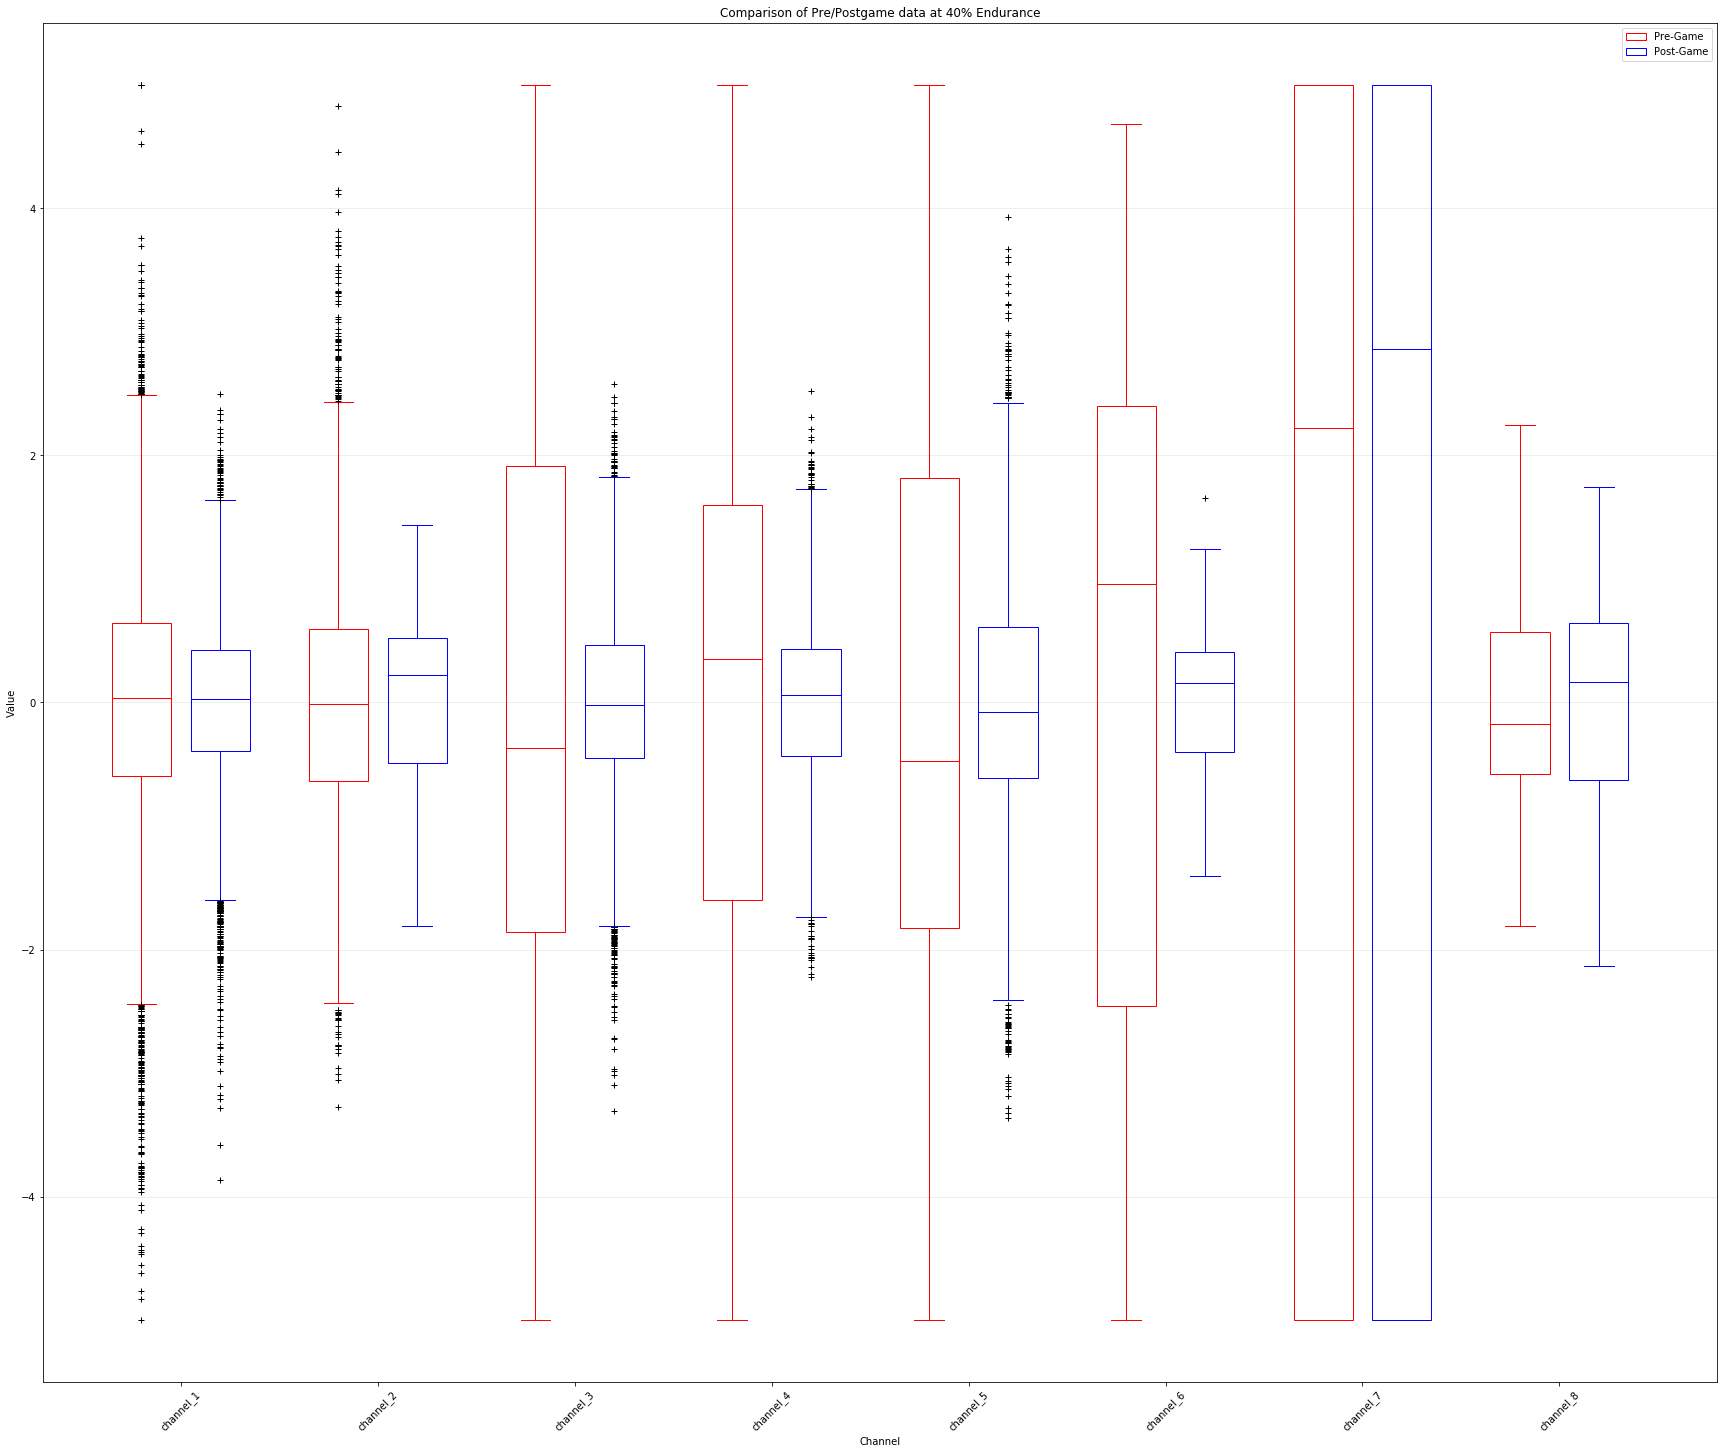

In [12]:
if DEBUG:
    fig, ax = plt.subplots(figsize=(30, 25))
    phase4_boxplot_per_user_all_channels(user_id, 'Fourty', ax)

In [13]:
# Phase 1:
# Scatter Plot between channels all movements -> General Impression
# Scatter Plot between channels per movement -> Analyse feasibility of feature reduction

In [14]:
# Scatter Plot between channels all movements -> General Impression
def phase1_scatterplot_all_users_all_movements_between_channels(ax):
    res = df[(df.gamePhase == 'Pregame') & (df.testPhase == '1')].copy()
    res.drop(labels = ['timeStamp', 'userID', 'gamePhase', 'testPhase', 'movementID'], axis = 1, inplace = True)
    corr = res.corr()
    _ = sns.heatmap(corr, annot=True, linewidths=3, ax=ax)
    m_title = 'Cross-correlation heatmap between channels'
    ax.set_title(m_title)

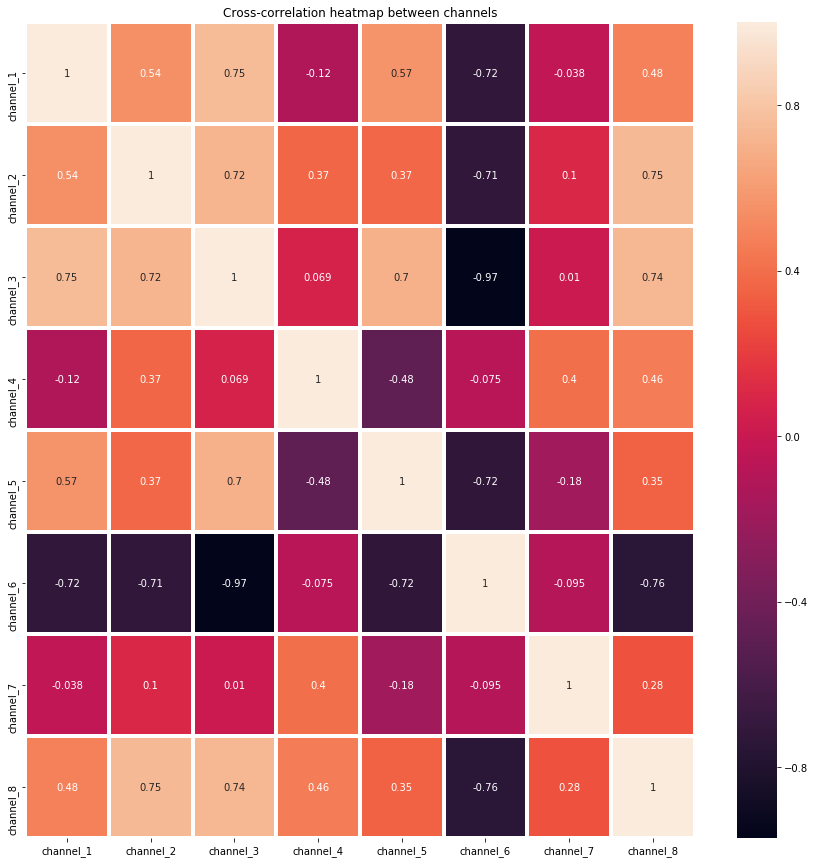

In [15]:
if DEBUG:
    fig, ax = plt.subplots(figsize=(15, 15))
    phase1_scatterplot_all_users_all_movements_between_channels(ax)

In [16]:
# Scatter Plot between channels per movement -> Analyse feasibility of feature reduction
def phase1_scatterplot_all_users_per_movement_between_channels(movement_id, ax):
    res = df[(df.gamePhase == 'Pregame') & (df.testPhase == '1') & (df.movementID == movement_id)].copy()
    res.drop(labels = ['timeStamp', 'userID', 'gamePhase', 'testPhase', 'movementID'], axis = 1, inplace = True)
    corr = res.corr()
    _ = sns.heatmap(corr, annot=True, linewidths=3, ax=ax)
    m_title = 'Cross-correlation heatmap between channels (' + movement_id + ')'
    ax.set_title(m_title)

Hand Closed


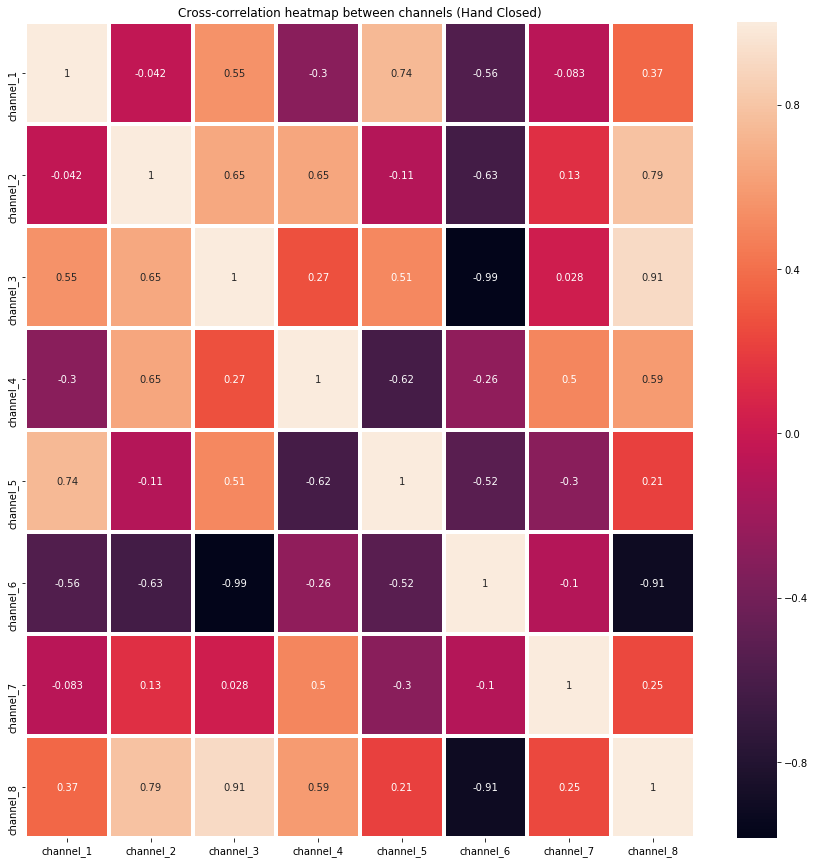

In [17]:
if DEBUG:
    dummy_movement = np.unique(df[df.testPhase == '1'].movementID)[0]
    print (dummy_movement)
    fig, ax = plt.subplots(figsize=(15, 15))
    phase1_scatterplot_all_users_per_movement_between_channels(np.unique(df[df.testPhase == '1'].movementID)[0], ax)

In [18]:
# Scatter Plot between movements per channel -> Analyse discrepancy between movements
def phase1_scatterplot_all_users_per_channel_between_movements(channel_id, ax):
    res = df[(df.gamePhase == 'Pregame') & (df.testPhase == '1')].loc[:, 'channel_1'].copy()
    res.drop(labels = ['timeStamp', 'userID', 'gamePhase', 'testPhase', 'movementID'], axis = 1, inplace = True)
    corr = res.corr()
    _ = sns.heatmap(corr, annot=True, linewidths=3, ax=ax)
    m_title = 'Cross-correlation heatmap between channels - Movement: ' + movement_id
    ax.set_title(m_title)

In [19]:
if False: # review if relevant at all -> Figure out how to best do it
    channel_id = 'channel_1'
    res = df[(df.gamePhase == 'Pregame') & (df.testPhase == '1')].copy()
    channels_list = res.loc[:, 'channel_1':'channel_8'].columns
    channels_list = np.delete(channels_list, np.argwhere(channels_list==channel_id))
    res.drop(labels = channels_list, axis = 1, inplace = True)
    res.drop(labels = ['timeStamp', 'userID', 'gamePhase', 'testPhase'], axis = 1, inplace = True)
    res.reset_index(drop=True, inplace = True)
    res = res.pivot(columns = 'movementID', values = 'channel_1').fillna(0)
    corr = res.corr()
    fig, ax = plt.subplots(figsize=(15, 15))
    _ = sns.heatmap(corr, annot=True, linewidths=3, ax=ax)
    m_title = 'Cross-correlation heatmap between channels - Movement: ' + movement_id
    ax.set_title(m_title)
    #fig, ax = plt.subplots(figsize=(15, 15))
    #phase1_scatterplot_all_users_per_channel_between_movements(channel_id, ax)

In [20]:
# Phase 5
# Distribution Plot Pre - Post comparison per Channel(2 plots per figure with each plot covering flexion - extension discrepancy)
# Scatter Plot between channels per movement -> Analyse feasibility of feature reduction

In [21]:
if DEBUG:
    res_pre = df[(df.gamePhase == 'Pregame') & (df.testPhase == '5') & (df.userID == user_id) & (df.movementID == 'Flexion')].copy()
    res_pre.drop(labels = ['gamePhase', 'testPhase', 'userID', 'timeStamp', 'movementID'], axis = 1, inplace = True)

    res_post = df[(df.gamePhase == 'Postgame') & (df.testPhase == '5') & (df.userID == user_id) & (df.movementID == 'Flexion')].copy()
    res_post.drop(labels = ['gamePhase', 'testPhase', 'userID', 'timeStamp', 'movementID'], axis = 1, inplace = True)


    sns.set(color_codes=True)
    fig, ax = plt.subplots(figsize=(15, 15))
    sns.distplot(res_pre.loc[:, channel], hist=False, rug=True, ax = ax);
    sns.distplot(res_post.loc[:, channel], hist=False, rug=True, ax = ax);
#for channel in res_pre.loc[:, 'channel_1':'channel_2'].columns:
#    fig, ax = plt.subplots(figsize=(15, 15))
#    sns.distplot(res_post.loc[:, channel], hist=False, rug=True, ax = ax);
#    sns.distplot(res_pre.loc[:, channel], hist=False, rug=True, ax = ax);

In [22]:
res_pre

NameError: name 'res_pre' is not defined

In [82]:
import os.path
import csv

actions = {'Fatigued':0, 'F':1, 'E':2, 'C':3, 'O': 4, 'rL':5, 'rR':6, 'Rest':7, 'NA':8}
actions_end = {'F end':11, 'E end': 12, 'C end': 13, 'O end': 14, 'rL end': 15, 'rR end': 16, 'Rest end':17}

def parse_amys_data(amys_path):
    print('starting the method')
    start_name = 'MyoBird_'
    only_files = [f for f in os.listdir(amys_path) if os.path.isfile(os.path.join(amys_path, f)) and f.startswith(start_name)]
    
    for file in only_files:
        user = []

        with open(os.path.join(amys_path, file), newline='\n') as csvfile:
            spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
            vector = []
            current_action = actions['NA']
            is_fatigued = False
            for row in spamreader:
                if len(row) == 0:
                    continue
                if len(row) <= 2:
                    assert_action_parsing(row[1])
                    if row[1] in actions_end:
                        current_action = actions['NA']
                    elif row[1] == 'Fatigued':
                        is_fatigued = True
                    else:
                        current_action = actions[row[1]]
                else:
                    vector.append([row[0]] + [current_action] + [is_fatigued] + [row[3:11]])
        
        user.append(vector)
                
    print(actions)
    print(actions_end)
        

def assert_action_parsing(action):
    if action not in actions:
        return
    if action not in actions_end:
        return
    print(action)
    raise Exception('Invalid parsing of actions')

    
data_path = "/Users/saksham/Documents/CMU/15-821/Amy's Data"
parse_amys_data(data_path)

starting the method
[[['63648160614684', 8, False, ['0.02846', '0.0719', '0.15309', '0.49562', '0.06389', '0.02799', '0.31614', '0.01988']], ['63648160614699', 8, False, ['0.02848', '0.07278', '0.15167', '0.49749', '0.05967', '0.02701', '0.31765', '0.02093']], ['63648160614733', 8, False, ['0.02632', '0.07678', '0.15399', '0.50123', '0.07239', '0.02406', '0.3159', '0.02034']], ['63648160614749', 8, False, ['0.02591', '0.07709', '0.1509', '0.50568', '0.07247', '0.02351', '0.3193', '0.02005']], ['63648160614782', 8, False, ['0.02671', '0.07278', '0.15321', '0.51421', '0.07401', '0.02331', '0.31518', '0.02089']], ['63648160614799', 8, False, ['0.02674', '0.07362', '0.14693', '0.51575', '0.07341', '0.02385', '0.31329', '0.0227']], ['63648160614832', 8, False, ['0.02541', '0.07365', '0.14549', '0.523', '0.06376', '0.02313', '0.31299', '0.02359']], ['63648160614848', 8, False, ['0.02473', '0.0697', '0.14314', '0.52475', '0.06836', '0.02373', '0.31188', '0.02278']], ['63648160614881', 8, Fals